In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
df = pd.read_csv('./dados/iris.csv')
df.head(10)

,comprimento_sépala,largura_sépala,comprimento_pétala,largura_pétala,espécie
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


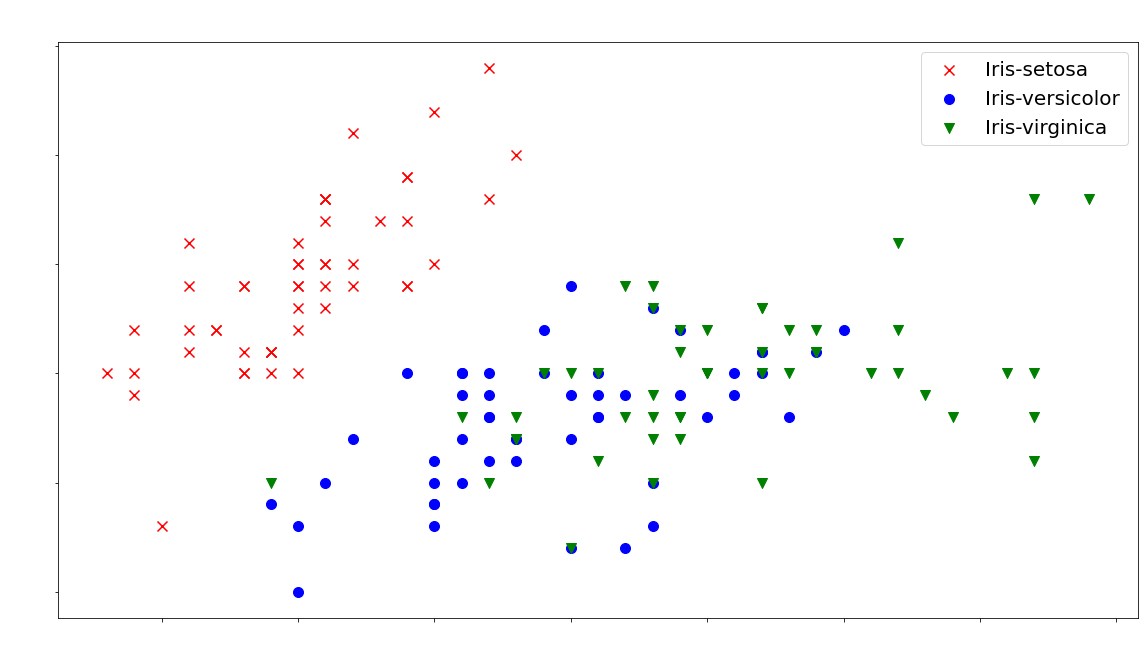

In [22]:
fig = plt.figure(figsize=(15,8))
eixo = fig.add_axes([0,0,1,1])
# Diciona
# ário de cores e marcadores
cores = {'Iris-setosa': 'r', 'Iris-versicolor': 'b', 'Iris-virginica': 'g'}
marcadores = {'Iris-setosa': 'x', 'Iris-versicolor': 'o', 'Iris-virginica': 'v'}

# colocando no gráfico todas as cores definidas no dicionário pra cada espécie
for especie in df['espécie'].unique():
    tmp = df[df['espécie'] == especie]
    eixo.scatter(tmp['comprimento_sépala'], tmp['largura_sépala'],
                 color=cores[especie], marker=marcadores[especie],s=100) #s = size

eixo.set_title('Gráfico de dispersão', fontsize=25, pad=15,color='w')
eixo.set_xlabel('Comprimento da sépala', fontsize=15,color='w')
eixo.set_ylabel('Largura da sépala', fontsize=15,color='w')
eixo.tick_params(labelsize=15, labelcolor='w') # tamanho valores do eixo X e Y
eixo.legend(cores, fontsize=20)

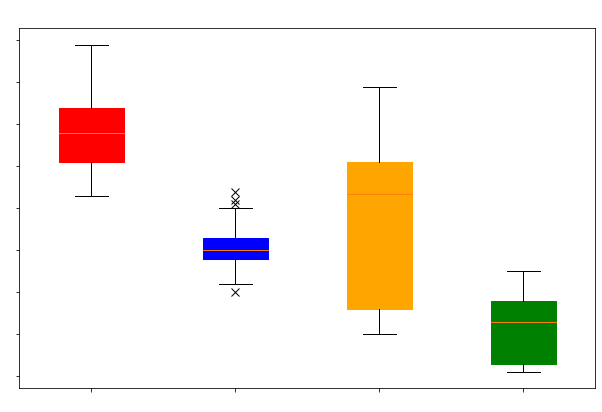

In [23]:
fig = plt.figure(figsize=(8,5))
eixo = fig.add_axes([0,0,1,1])

cores = ['red', 'blue', 'orange', 'green']

caixas = eixo.boxplot(df.drop('espécie', axis=1), patch_artist=True) # removendo a coluna espécie
eixo.set_title('Gráfico de caixa', fontsize=15, pad=10,color='w')
eixo.set_xticklabels(df.drop('espécie', axis=1).columns,color='w')

eixo.tick_params(labelsize=8, labelcolor='w') # tamanho valores do eixo X e Y

# Percorre duas listas simultaneamente usando a função zip()
# Associa cada caixinha do boxplot com a cor no array cores
for caixa, cor in zip(caixas['boxes'], cores):
    caixa.set(color=cor)

# trocando o outliers de '0' por 'x'
for outlier in caixas['fliers']:
    outlier.set(marker='x', markersize=8)


## Histograma

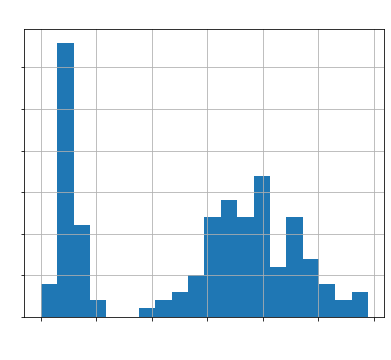

In [34]:
fig = plt.figure(figsize=(5,4))
eixo = fig.add_axes([0,0,1,1])

eixo.hist(df['comprimento_pétala'], bins=20)
eixo.set_title('Histograma', fontsize=15, pad=10,color='w')
eixo.set_xlabel('Comprimento da pétala', fontsize=15,color='w')
eixo.tick_params(labelsize=8, labelcolor='w') # tamanho valores do eixo X e Y
eixo.grid(True)

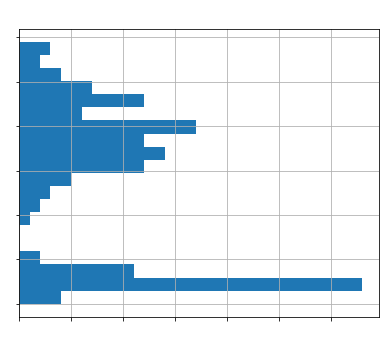

In [35]:
# visualização Horizontal
fig = plt.figure(figsize=(5,4))
eixo = fig.add_axes([0,0,1,1])

eixo.hist(df['comprimento_pétala'], bins=20, orientation='horizontal')
eixo.set_title('Histograma', fontsize=15, pad=10,color='w')
eixo.set_xlabel('Comprimento da pétala', fontsize=15,color='w')
eixo.tick_params(labelsize=8, labelcolor='w') # tamanho valores do eixo X e Y
eixo.grid(True)

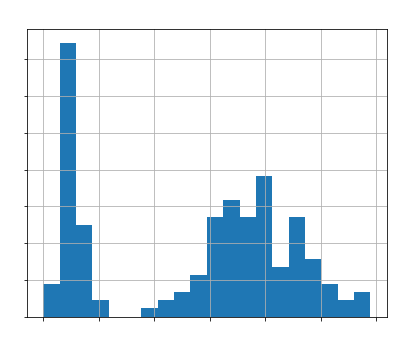

In [36]:
fig = plt.figure(figsize=(5,4))
eixo = fig.add_axes([0,0,1,1])

eixo.hist(df['comprimento_pétala'], bins=20, density=True)
eixo.set_title('Histograma', fontsize=15, pad=10,color='w')
eixo.set_xlabel('Comprimento da pétala', fontsize=15,color='w')
eixo.tick_params(labelsize=8, labelcolor='w') # tamanho valores do eixo X e Y
eixo.grid(True)

### Anexando informações

Text(4.35, 31, 'mediana')

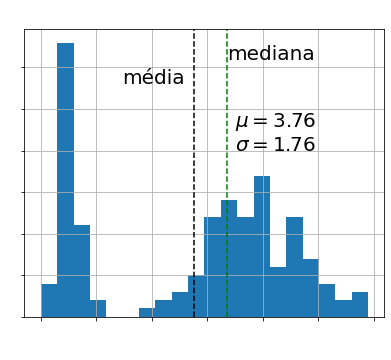

In [42]:
fig = plt.figure(figsize=(5,4))
eixo = fig.add_axes([0,0,1,1])

mu, sigma = df['comprimento_pétala'].mean(), df['comprimento_pétala'].std()

eixo.hist(df['comprimento_pétala'], bins=20)
eixo.set_title('Histograma', fontsize=15, pad=10,color='w')
eixo.set_xlabel('Comprimento da pétala', fontsize=15,color='w')
eixo.tick_params(labelsize=8, labelcolor='w') # tamanho valores do eixo X e Y
eixo.grid(True)

# Adiconando no gráfico a média e desvio padrão.
eixo.annotate('$\mu = {0:.2f}$\n$\sigma = {1:.2f}$'.format(mu, sigma),
               xy=(4.5, 20), fontsize=20)
# Adiconando no gráfico o tracejado da média
eixo.axvline(mu, color = 'k', linestyle='--')
eixo.annotate('média', xy=(mu-1.3, 28), fontsize=20)
# Adiconando no gráfico o tracejado da mediana
eixo.axvline(df['comprimento_pétala'].median(), color='g', linestyle='--')
eixo.annotate('mediana', xy=(df['comprimento_pétala'].median(), 31), fontsize=20)

# Salvando em arquivo

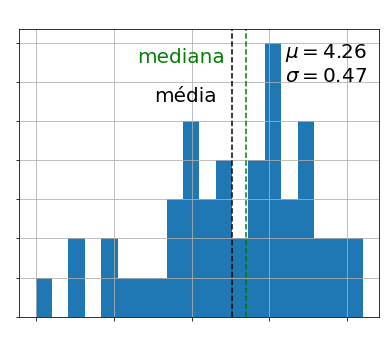

In [45]:
# Tipo de iris = Iris-versicolor

fig = plt.figure(figsize=(5,4))
eixo = fig.add_axes([0,0,1,1])

df_iv = df[df['espécie'] == 'Iris-versicolor']

mu, sigma = df_iv['comprimento_pétala'].mean(), df_iv['comprimento_pétala'].std()

eixo.hist(df_iv['comprimento_pétala'], bins=20)
eixo.set_title('Iris Versicolor', fontsize=15, pad=10)
eixo.set_xlabel('Comprimento da pétala', fontsize=15)
#eixo.tick_params(labelsize=8, labelcolor='w') # tamanho valores do eixo X e Y
eixo.grid(True)

# Adiconando no gráfico a média e desvio padrão.
eixo.annotate('$\mu = {0:.2f}$\n$\sigma = {1:.2f}$'.format(mu, sigma),
               xy=(4.6, 6), fontsize=20)
# Adiconando no gráfico o tracejado da média
eixo.axvline(mu, color = 'k', linestyle='--')
eixo.annotate('média', xy=(mu-0.5, 5.5), fontsize=20)
# Adiconando no gráfico o tracejado da mediana
eixo.axvline(df_iv['comprimento_pétala'].median(), color='g', linestyle='--')
eixo.annotate('mediana', xy=(df_iv['comprimento_pétala'].median()-0.7, 6.5), fontsize=20,color='g')

fig.savefig('./images/histograma_iv.png', bbox_inches='tight')

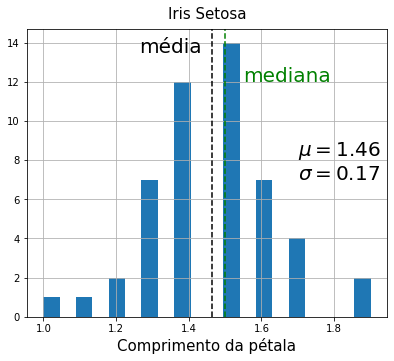

In [46]:
# Tipo de iris = Iris-setosa

fig = plt.figure(figsize=(5,4))
eixo = fig.add_axes([0,0,1,1])

df_is = df[df['espécie'] == 'Iris-setosa']

mu, sigma = df_is['comprimento_pétala'].mean(), df_is['comprimento_pétala'].std()

eixo.hist(df_is['comprimento_pétala'], bins=20)
eixo.set_title('Iris Setosa', fontsize=15, pad=10)
eixo.set_xlabel('Comprimento da pétala', fontsize=15)
eixo.grid(True)

eixo.annotate('$\mu = {0:.2f}$\n$\sigma = {1:.2f}$'.format(mu, sigma),
               xy=(1.7, 7), fontsize=20)

eixo.axvline(mu, color = 'k', linestyle='--')
eixo.annotate('média', xy=(mu-0.2, 13.5), fontsize=20)

eixo.axvline(df_is['comprimento_pétala'].median(), color='g', linestyle='--')
eixo.annotate('mediana', xy=(df_is['comprimento_pétala'].median()+0.05, 12), fontsize=20,
               color='g')

fig.savefig('./images/histograma_is.png', bbox_inches='tight')

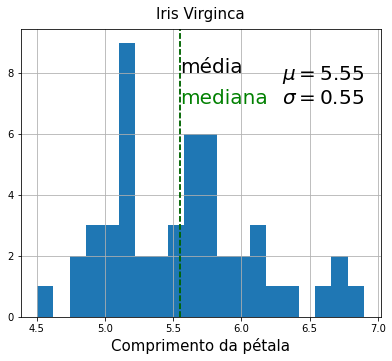

In [48]:
# Tipo de iris = Iris-virginica

fig = plt.figure(figsize=(5,4))
eixo = fig.add_axes([0,0,1,1])

df_ivc = df[df['espécie'] == 'Iris-virginica']

mu, sigma = df_ivc['comprimento_pétala'].mean(), df_ivc['comprimento_pétala'].std()

eixo.hist(df_ivc['comprimento_pétala'], bins=20)
eixo.set_title('Iris Virginca', fontsize=15, pad=10)
eixo.set_xlabel('Comprimento da pétala', fontsize=15)
eixo.grid(True)

eixo.annotate('$\mu = {0:.2f}$\n$\sigma = {1:.2f}$'.format(mu, sigma),
               xy=(6.3, 7), fontsize=20)

eixo.axvline(mu, color = 'k', linestyle='--')
eixo.annotate('média', xy=(mu, 8), fontsize=20)

eixo.axvline(df_ivc['comprimento_pétala'].median(), color='g', linestyle='--')
eixo.annotate('mediana', xy=(df_ivc['comprimento_pétala'].median(), 7), fontsize=20,
               color='g')

fig.savefig('./images/histograma_ivg.png', bbox_inches='tight')

In [52]:
# biblioteca de imagem
from PIL import Image

largura, altura = Image.open('./images/histograma_ivg.png').size # salvando em uma tupla a largura e altura da imagem
combinada = Image.new("RGB", (3*largura, altura))
intervalo = 0
for imagem in map(Image.open, ['./images/histograma_iv.png', './images/histograma_is.png',
                               './images/histograma_ivg.png']):
    combinada.paste(imagem, (intervalo, 0)) # colando as imagens uma ao lado da outra (intervalo = x, 0 = y)
    intervalo += largura # espeçando cada imagem

combinada.save('./images/combinada.png')

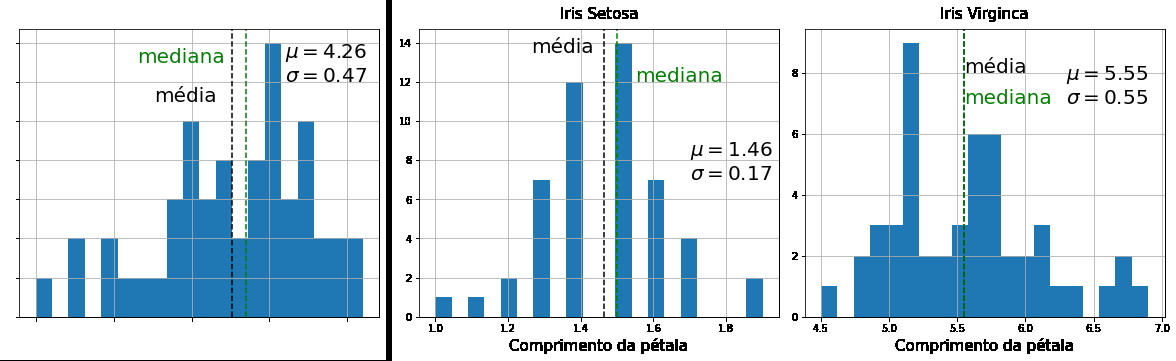

In [53]:
combinada